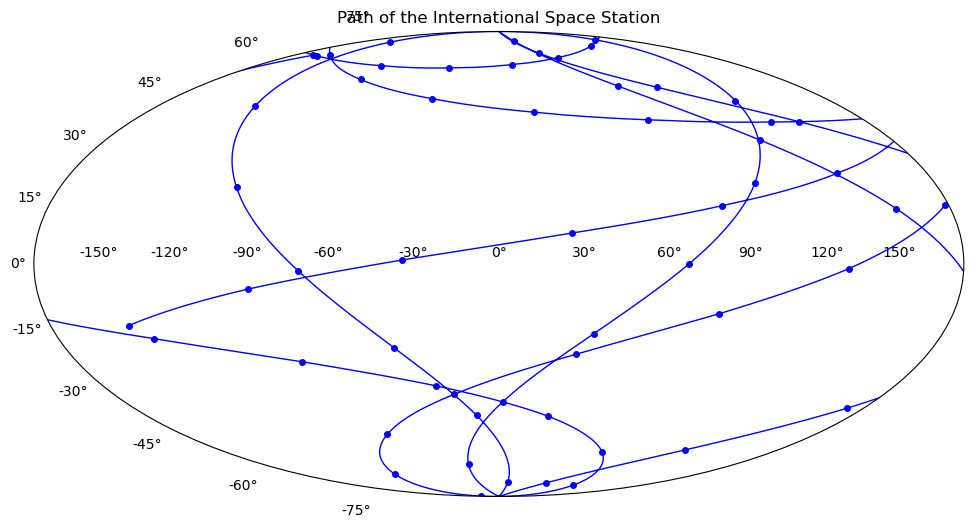

In [1]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime
import time

# Track ISS location and collect data
latitude = []
longitude = []
timestamps = []

num_data_points = 100
api_url = "http://api.open-notify.org/iss-now.json"

for _ in range(num_data_points):
    response = requests.get(api_url)
    if response.status_code == 200:
        data = response.json()
        timestamp = datetime.fromtimestamp(int(data['timestamp']))
        lat = float(data['iss_position']['latitude'])
        lon = float(data['iss_position']['longitude'])

        latitude.append(lat)
        longitude.append(lon)
        timestamps.append(timestamp)

    # Sleep for 10 seconds between requests
    time.sleep(10)

# Plotting the ISS path on a map
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='hammer')

ax.plot(longitude, latitude, marker='o', markersize=4, linestyle='-', linewidth=1, color='blue')

ax.set_title('Path of the International Space Station')
plt.show()